In [5]:
from helpers import load_csv_data
data_folder = 'C:/Users/ACER/OneDrive - epfl.ch/Desktop/ML/dataset/'
x_train, x_test, y_train, train_ids, test_ids, train_columns, test_columns = load_csv_data(data_folder, sub_sample=True)

from implementations import normalize
x_train, x_test = normalize(x_train, x_test)


In [8]:
x_train.shape, x_test.shape, y_train.shape


((500, 321), (500, 321), (500,))

## Test of the algorithms on a linear regression between 2 features

Weights from GD:  [-5.57485646e-17  9.32186343e-01]
Weights from SGD:  [0.00586741 1.04187243]
Weights from LS:  [2.08952258e-17 9.32211103e-01]


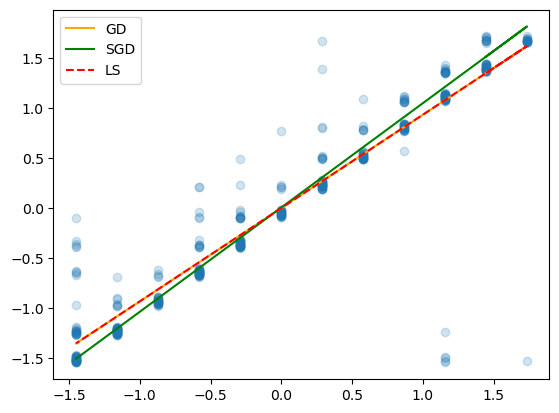

In [2]:
# We observe that features 1 and 2 are correlated
# Let's test our algorithms on these two features only

import numpy as np
from matplotlib import pyplot as plt
from implementations import mean_squared_error_gd, mean_squared_error_sgd, least_squares

tx = np.ones((x_train.shape[0], 2))
tx[:, 1] = x_train[:, 1]

w_gd, _ = mean_squared_error_gd(x_train[:,2], tx, np.array([0., 0.]), max_iters=100, gamma=0.1)
w_sgd, _ = mean_squared_error_sgd(x_train[:,2], tx, np.array([0., 0.]), max_iters=10000, gamma=0.1)
w_ls, _ = least_squares(x_train[:,2], tx)

print("Weights from GD: ", w_gd)
print("Weights from SGD: ", w_sgd)
print("Weights from LS: ", w_ls)

plt.scatter(x_train[:, 1], x_train[:, 2], alpha=0.2)
plt.plot(x_train[:, 1], tx @ w_gd, label='GD', color='orange')
plt.plot(x_train[:, 1], tx @ w_sgd, label='SGD', color='green')
plt.plot(x_train[:, 1], tx @ w_ls, label='LS', color='red', linestyle='dashed')
plt.legend()

# Preprocessing


Dealing with NaN values, correlated columns, categoric variable.
Handle outliers, encode categorical, feature normalization.


In [ ]:
non_nan_mask = ~np.isnan(x_train).any(axis = 0)
non_nan_indices = np.where(non_nan_mask)[0]

print("Indices of columns with no NaN values:", non_nan_indices)
print("Number of columns without NaNs:", non_nan_mask.sum())

Indices of columns with no NaN values: [  0   1   2   3   4   5   6   7   8  26  27  28  30  31  32  33  34  36
  39  40  42  43  44  45  46  47  48  50  51  52  53  57  58  59 216 217
 219 220 221 222 227 229 230 231 232 233 235 236 237 239 240 241 242 243
 244 246 247 248 249 255 256 257 258 259 260 261 262 263 264 265 272 273
 274 275 278 279 280 281 282 283 284 287 288 298 305 306 307 308 309 310
 311 312 316 317]
Number of columns without NaNs: 94
